# Study of Relationship between EV Sales and EV charging infrastructure

* This notebook contains the analysis of relationship between EV sales and EV charging infrastructure over time 
---

Assignment submitted by: Py-Crazies


In [22]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn as sns

styles = [dict(selector="caption", props=[("font-size", "120%"),("font-weight", "bold"),("background-color", "wheat"),("font-color","black")])]

lower_year_limit = 2016
higher_year_limit =  2021

## Read Data

In [23]:
# File to Load (Remember to Change These)
ev_charge_station_history = "../Data/ev-charge-stations-in-states-by-year.csv"
ev_sales_per_state = "../Data/ev_per_state_count.csv"
states_population = "../Data/states-population-2010-2020.csv"

# Read data
charge_stations_pre_df = pd.read_csv(ev_charge_station_history)
ev_sales_df = pd.read_csv(ev_sales_per_state)
states_population_pre_df = pd.read_csv(states_population)
charge_stations_pre_df.head()

,State,stations_2021,stations_2020,stations_2019,stations_2018,stations_2017,stations_2016,stations_2015,stations_2014,stations_2013,stations_2012,stations_2011
0,Alabama,276,223,195,165,146,113,101,67,0,4,0
1,Alaska,52,25,19,7,7,3,2,1,50,48,4
2,Arizona,890,574,522,479,432,424,322,309,38,36,11
3,Arkansas,160,112,98,70,62,63,44,41,710,527,43
4,California,14616,7671,6435,5469,4657,4175,3329,2344,5176,3573,1392


### Data Preparation

In [24]:
#Truncate years not relevant
#date_range = pd.period_range("2016-01", "2018-01",freq='m')
drop_station_columns = []
drop_station_columns.append('stations_2021')
for year in range(2011,2016):
    drop_station_columns.append(f'stations_{year}')
charge_stations_df = charge_stations_pre_df.loc[:, charge_stations_pre_df.columns.drop(drop_station_columns)]
    # 'stations_2021','stations_2015','stations_2014','stations_2013','stations_2012','stations_2011'])]

drop_population_columns = []
for year in range(2010,2016):
    drop_population_columns.append(f'population_{year}')
states_population_df = states_population_pre_df.loc[:,states_population_pre_df.columns.drop(drop_population_columns)]
# ['population_2010','population_2011','population_2012','population_2013','population_2014','population_2015'])]

# Merge the data into a single dataset.  
ev_sales_cstation_combo = pd.merge(ev_sales_df, charge_stations_df, on=["State", "State"])
ev_sales_cstation_combo = pd.merge(ev_sales_cstation_combo, states_population_df, on=["State", "State"])


ev_sales_cstation_combo.sort_values(by='State',inplace=True)

# ev_sales_cstation_combo.head()
ev_sales_cstation_combo.head().style.set_caption("EV Sales / Charge Station Ratio").set_table_styles(styles)

,State,sales_2016,sales_2017,sales_2018,sales_2019,sales_2020,stations_2020,stations_2019,stations_2018,stations_2017,stations_2016,population_2016,population_2017,population_2018,population_2019,population_2020
33,Alabama,330,381,866,839,829,223,195,165,146,113,4866824,4877989,4891628,4907965,4921532
46,Alaska,94,85,155,150,148,25,19,7,7,3,742575,740983,736624,733603,731158
9,Arizona,2265,2976,7086,6867,6786,574,522,479,432,424,6944767,7048088,7164228,7291843,7421401
42,Arkansas,138,187,435,422,417,112,98,70,62,63,2991815,3003855,3012161,3020985,3030522
0,California,73854,94873,153442,148710,146951,7671,6435,5469,4657,4175,39149186,39337785,39437463,39437610,39368078


### Correlation of EV Sales and Charging Infrastructure
- Observation - Charging infrastructure has a direct correlation with sales of EV

In [25]:
for year in range(lower_year_limit,higher_year_limit):
    print(f'Year:{year}')
    sales_col_idx = ev_sales_cstation_combo.columns.get_loc(f'sales_{year}')
    station_col_idx = ev_sales_cstation_combo.columns.get_loc(f'stations_{year}')
    sales = ev_sales_cstation_combo.iloc[:,sales_col_idx]
    station = ev_sales_cstation_combo.iloc[:,station_col_idx]
    correlation = round(st.pearsonr(sales,station)[0],2)
    print(f"The correlation between both factors EV sales and charging infrastructure: {correlation}")
    if correlation > 0.5:
        print(f'Implies a strong linear relation')
    elif correlation < 0.5:
        print(f'Implies a medium linear relation')
    elif correlation == 0:
        print(f'Implies NO linear relation')
    elif correlation < 0:
        print(f'Implies a negative linear relation')
    print(f'------------------------------')
    print()

Year:2016
The correlation between both factors EV sales and charging infrastructure: 0.96
Implies a strong linear relation
------------------------------

Year:2017
The correlation between both factors EV sales and charging infrastructure: 0.96
Implies a strong linear relation
------------------------------

Year:2018
The correlation between both factors EV sales and charging infrastructure: 0.97
Implies a strong linear relation
------------------------------

Year:2019
The correlation between both factors EV sales and charging infrastructure: 0.96
Implies a strong linear relation
------------------------------

Year:2020
The correlation between both factors EV sales and charging infrastructure: 0.97
Implies a strong linear relation
------------------------------



### Calculate Ratios

In [26]:

#Compute ratio of sales/charger
ev_sales_cstation_combo["Total EV Sales"] = 0.00
ev_sales_cstation_combo["Total Charge Stations"] = 0.00
ev_sales_cstation_combo["Total Population"] = 0.00
ev_sales_cstation_combo["ev_TslsVsTpop(*1000)"] = 0.00
ev_sales_cstation_combo["ev_TslsVsTchg"] = 0.00

ratio_fields = []
ratio_fields.append('State')
ratio_fields.append('Total EV Sales')
ratio_fields.append('Total Charge Stations')
ratio_fields.append('Total Population')
ratio_fields.append('ev_TslsVsTpop(*1000)')
ratio_fields.append('ev_TslsVsTchg')

for year in range(lower_year_limit,higher_year_limit):
    
    ratio_fields.append(f'ev_slsVschg_{year}')
    ev_sales_cstation_combo[f'ev_slsVschg_{year}'] = ev_sales_cstation_combo[f'sales_{year}'] / ev_sales_cstation_combo[f'stations_{year}']
    
    ratio_fields.append(f'ev_slsVspop_{year}')
    ev_sales_cstation_combo[f'ev_slsVspop_{year}'] = ((ev_sales_cstation_combo[f'sales_{year}'] / ev_sales_cstation_combo[f'population_{year}'])) #.map("{:.3%}".format)
    
    ev_sales_cstation_combo["Total EV Sales"] = ev_sales_cstation_combo["Total EV Sales"]  + ev_sales_cstation_combo[f'sales_{year}']
    ev_sales_cstation_combo["Total Charge Stations"] = ev_sales_cstation_combo["Total Charge Stations"]  + ev_sales_cstation_combo[f'stations_{year}']
    ev_sales_cstation_combo["Total Population"] = ev_sales_cstation_combo["Total Population"] + ev_sales_cstation_combo[f'population_{year}']

# ['State','2016','ev_sls%_2016', '2017','ev_sls%_2017''2018', 'ev_sls%_2016''2019','2020','Total EV Sales', 'Total Charge Stations']
ev_sales_cstation_combo[f'ev_TslsVsTpop(*1000)'] = ((ev_sales_cstation_combo['Total EV Sales'] / ev_sales_cstation_combo['Total Population'])*1000) #.map("{:.3%}".format)
ev_sales_cstation_combo[f'ev_TslsVsTchg'] = ((ev_sales_cstation_combo['Total EV Sales'] / ev_sales_cstation_combo['Total Charge Stations'])) #.map("{:.3%}".format)

ev_sales_cstation_ratio = ev_sales_cstation_combo[ratio_fields]
ev_sales_cstation_ratio["State"].apply(str)
ev_sales_cstation_ratio

# for year in range(lower_year_limit,higher_year_limit):
ev_sales_cstation_ratio.style.set_caption("EV Sales / Charge Station Ratio")
ev_sales_cstation_ratio.style.set_table_styles(styles)



,State,Total EV Sales,Total Charge Stations,Total Population,ev_TslsVsTpop(*1000),ev_TslsVsTchg,ev_slsVschg_2016,ev_slsVspop_2016,ev_slsVschg_2017,ev_slsVspop_2017,ev_slsVschg_2018,ev_slsVspop_2018,ev_slsVschg_2019,ev_slsVspop_2019,ev_slsVschg_2020,ev_slsVspop_2020
33,Alabama,3245.000000,842.000000,24465938.000000,0.132633,3.853919,2.920354,0.000068,2.609589,0.000078,5.248485,0.000177,4.302564,0.000171,3.717489,0.000168
46,Alaska,632.000000,61.000000,3684943.000000,0.171509,10.360656,31.333333,0.000127,12.142857,0.000115,22.142857,0.000210,7.894737,0.000204,5.920000,0.000202
9,Arizona,25980.000000,2431.000000,35870327.000000,0.724276,10.686960,5.341981,0.000326,6.888889,0.000422,14.793319,0.000989,13.155172,0.000942,11.822300,0.000914
42,Arkansas,1599.000000,405.000000,15059338.000000,0.106180,3.948148,2.190476,0.000046,3.016129,0.000062,6.214286,0.000144,4.306122,0.000140,3.723214,0.000138
0,California,617830.000000,28407.000000,196730122.000000,3.140495,21.749217,17.689581,0.001886,20.372128,0.002412,28.056683,0.003891,23.109557,0.003771,19.156694,0.003733
8,Colorado,27505.000000,3630.000000,28424625.000000,0.967647,7.577135,6.119639,0.000489,7.488288,0.000740,9.944993,0.001238,7.937282,0.001187,6.358757,0.001163
18,Connecticut,13811.000000,1955.000000,17852743.000000,0.773607,7.064450,4.457227,0.000422,6.490141,0.000644,8.916449,0.000955,7.843602,0.000928,7.173246,0.000920
37,Delaware,2573.000000,244.000000,4838393.000000,0.531788,10.545082,11.233333,0.000355,10.837838,0.000419,12.540000,0.000648,10.666667,0.000623,8.571429,0.000608
2,Florida,52940.000000,6729.000000,106084620.000000,0.499036,7.867439,6.481865,0.000303,5.900359,0.000313,10.825434,0.000645,8.503201,0.000618,7.203622,0.000604
14,Georgia,22435.000000,3939.000000,52582899.000000,0.426660,5.695608,4.148211,0.000236,3.507225,0.000233,7.797403,0.000571,6.597506,0.000548,5.704365,0.000537


### Highest EV Sales and Charge Infra Ratio (on Total)
- It is observed that increase in charging infrastructure has a direct impact on the sales, case in point california where the sales dropped in 2019 with drop in charging infra
- Oregon on the other hand continued to grow until 2020 where there is a drop in both charging infra and sales

In [27]:
# Sort the schools by the latest year in descending order and display the top 5 rows.
latest_highest_adoption = ev_sales_cstation_ratio.sort_values(by='ev_TslsVsTchg',ascending=False, axis=0)
latest_highest_adoption.head(5).style.set_caption(f'Highest EV Sales and Charge Infra Ratio').set_table_styles(styles)

,State,Total EV Sales,Total Charge Stations,Total Population,ev_TslsVsTpop(*1000),ev_TslsVsTchg,ev_slsVschg_2016,ev_slsVspop_2016,ev_slsVschg_2017,ev_slsVspop_2017,ev_slsVschg_2018,ev_slsVspop_2018,ev_slsVschg_2019,ev_slsVspop_2019,ev_slsVschg_2020,ev_slsVspop_2020
0,California,617830.000000,28407.000000,196730122.000000,3.140495,21.749217,17.689581,0.001886,20.372128,0.002412,28.056683,0.003891,23.109557,0.003771,19.156694,0.003733
5,New Jersey,36028.000000,1832.000000,44427090.000000,0.810947,19.665939,16.311475,0.000449,18.992453,0.000566,29.967532,0.001038,19.573304,0.001006,15.842294,0.000995
24,Oklahoma,8806.000000,573.000000,19746692.000000,0.445948,15.368237,4.870370,0.000067,11.516667,0.000176,41.276923,0.000680,19.847328,0.000656,9.768061,0.000645
9,Arizona,25980.000000,2431.000000,35870327.000000,0.724276,10.686960,5.341981,0.000326,6.888889,0.000422,14.793319,0.000989,13.155172,0.000942,11.822300,0.000914
37,Delaware,2573.000000,244.000000,4838393.000000,0.531788,10.545082,11.233333,0.000355,10.837838,0.000419,12.540000,0.000648,10.666667,0.000623,8.571429,0.000608


### Lowest EV Sales and Charge Infra Ratio (on Total)
- It is observed that due to decrease in charging infrastructure the sales has dropped, case in point Mississippi, between 2018 and 2020
- Also there are states where the charging infrastructure has not

In [28]:
# Sort by  total sales Vs total charge ascending to find the lowest sales vs charge infra 
latest_highest_adoption = ev_sales_cstation_ratio.sort_values(by='ev_TslsVsTchg',ascending=True)
latest_highest_adoption.head(5).style.set_caption(f'Lowest EV Sales and Charge Infra Ratio').set_table_styles(styles)

,State,Total EV Sales,Total Charge Stations,Total Population,ev_TslsVsTpop(*1000),ev_TslsVsTchg,ev_slsVschg_2016,ev_slsVspop_2016,ev_slsVschg_2017,ev_slsVspop_2017,ev_slsVschg_2018,ev_slsVspop_2018,ev_slsVschg_2019,ev_slsVspop_2019,ev_slsVschg_2020,ev_slsVspop_2020
48,Wyoming,361.000000,232.000000,2906735.000000,0.124194,1.556034,1.281250,0.000070,1.378378,0.000088,2.044444,0.000159,1.561404,0.000153,1.442623,0.000151
45,West Virginia,822.000000,383.000000,9037121.000000,0.090958,2.146214,1.651163,0.000039,1.637681,0.000062,2.449438,0.000121,2.370787,0.000118,2.247312,0.000117
44,Mississippi,874.000000,342.000000,14909161.000000,0.058622,2.555556,1.707317,0.000023,2.245614,0.000043,3.982759,0.000077,2.765432,0.000075,2.104762,0.000074
47,South Dakota,511.000000,168.000000,4396655.000000,0.116225,3.041667,1.608696,0.000043,3.038462,0.000090,4.090909,0.000154,3.195122,0.000148,2.866667,0.000145
27,Tennessee,7483.000000,2279.000000,33861364.000000,0.220989,3.283458,1.997664,0.000129,1.769575,0.000118,4.353712,0.000294,4.267108,0.000283,3.874239,0.000277


### Create sub-data frames: Sales-Charging Ratio / Sales-Population by year (Top and bottom 10)

In [29]:
ratio_fields = []
ratio_fields.append('State')
for year in range(lower_year_limit,higher_year_limit):
        ratio_fields.append(f'ev_slsVschg_{year}')

ev_slsVschg_top10 = ev_sales_cstation_ratio.sort_values(by='ev_TslsVsTchg',ascending=False).head(5)[ratio_fields]
ev_slsVschg_top10.set_index("State")


,ev_slsVschg_2016,ev_slsVschg_2017,ev_slsVschg_2018,ev_slsVschg_2019,ev_slsVschg_2020
State,,,,,
California,17.689581,20.372128,28.056683,23.109557,19.156694
New Jersey,16.311475,18.992453,29.967532,19.573304,15.842294
Oklahoma,4.870370,11.516667,41.276923,19.847328,9.768061
Arizona,5.341981,6.888889,14.793319,13.155172,11.822300
Delaware,11.233333,10.837838,12.540000,10.666667,8.571429


In [30]:
ev_slsVschg_bot10 = ev_sales_cstation_ratio.sort_values(by='ev_TslsVsTchg',ascending=True).head(5)[ratio_fields]
ev_slsVschg_bot10.set_index("State")

,ev_slsVschg_2016,ev_slsVschg_2017,ev_slsVschg_2018,ev_slsVschg_2019,ev_slsVschg_2020
State,,,,,
Wyoming,1.281250,1.378378,2.044444,1.561404,1.442623
West Virginia,1.651163,1.637681,2.449438,2.370787,2.247312
Mississippi,1.707317,2.245614,3.982759,2.765432,2.104762
South Dakota,1.608696,3.038462,4.090909,3.195122,2.866667
Tennessee,1.997664,1.769575,4.353712,4.267108,3.874239


### Merge and plot the Top10 and Bottom10 and for visual analysis

In [31]:
ev_TBslsVschg_plot = pd.concat([ev_slsVschg_top10,ev_slsVschg_bot10]).set_index("State")
ev_TBslsVschg_plot

for year in range(lower_year_limit,higher_year_limit):
         field_name = (f'ev_slsVschg_{year}')
         ev_TBslsVschg_plot.rename(columns={ field_name: year},inplace=True)
ev_TBslsVschg_plot_transpose = ev_TBslsVschg_plot.transpose()
ev_TBslsVschg_plot_transpose
#ev_TBslsVschg_plot_transpose["State"] = ev_TBslsVschg_plot_transpose["State"].astype('str')

State,California,New Jersey,Oklahoma,Arizona,Delaware,Wyoming,West Virginia,Mississippi,South Dakota,Tennessee
2016,17.689581,16.311475,4.870370,5.341981,11.233333,1.281250,1.651163,1.707317,1.608696,1.997664
2017,20.372128,18.992453,11.516667,6.888889,10.837838,1.378378,1.637681,2.245614,3.038462,1.769575
2018,28.056683,29.967532,41.276923,14.793319,12.540000,2.044444,2.449438,3.982759,4.090909,4.353712
2019,23.109557,19.573304,19.847328,13.155172,10.666667,1.561404,2.370787,2.765432,3.195122,4.267108
2020,19.156694,15.842294,9.768061,11.822300,8.571429,1.442623,2.247312,2.104762,2.866667,3.874239


<AxesSubplot:>

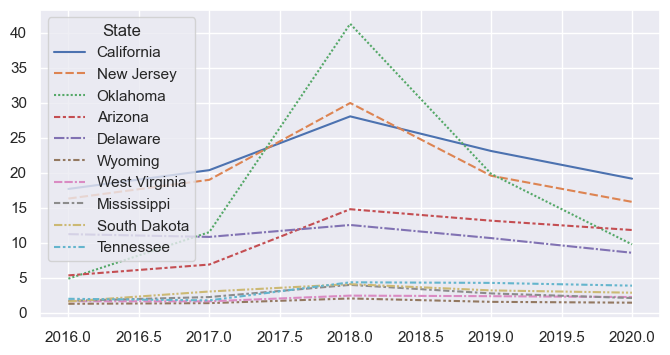

In [32]:
#define figure size
sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4

sns.lineplot(data=ev_TBslsVschg_plot_transpose)


---------------------------
#Summary Report

From analyzing various data points from Sales Vs Charge infrastructure
 1. There seems to be a direct correlation between sales vs charge infrastructure
 2. The charge infrastructure in some states do have a saturation point
 3. 
 4. How is the money spent across various school programs

From Size Perspective...................................................... 
Smaller school have performed better, this could be due to student-teacher ratio
The difference in overall performance does not appear to be big when we compare the school size less than 1000 versus the school size between 1000-200
Smaller schools also mean higher per student cost , so the optimal size for schools appears to be 1000-2000 students

From Type Perspective...................................................... 
Over all charter schools appear to do better than district schools
More data needed to break down the reason behind this
---------------------------